In [26]:
import pandas as pd # voor dataprocessing, importeren csv file etc.
from sklearn.model_selection import train_test_split # voor het splitsen van train en testdata
# de Decision Tree Classifier en optie om classifier om te zetten in dot_data:
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import classification_report, confusion_matrix # om het model te evalueren
from sklearn.externals.six import StringIO # wordt gebruikt om een tijdelijke, virtuele file aan te maken
from IPython.display import Image # om de gegenereerde png file van de tree in jupyter te tonen
import pydotplus # voor het omzetten van de data uit een dot file in een graph

In [27]:
# Importeren dataset en printen van aantal rijen/kolommen, de eerste 5 records
# en verdere info zoals gemiddelde en std. deviatie
iris = pd.read_csv("iris.csv")
print(iris.shape)
print('\n')
print(iris.head())
print('\n')
print(iris.describe())

(150, 5)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [28]:
# Splitsen in trainset/testset en tonen rijen/kolommen van iedere set en eerste 5 records van trainset
trainSet, testSet = train_test_split(iris, test_size = 0.33)
print(trainSet.shape)
print(testSet.shape)
trainSet.head()

(100, 5)
(50, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
47,4.6,3.2,1.4,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor


In [29]:
# Splitsen doelvariabelen en predictorvariabelen
trainData = pd.DataFrame.as_matrix(trainSet[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
trainTarget = pd.DataFrame.as_matrix(trainSet[['species']]).ravel()
testData = pd.DataFrame.as_matrix(testSet[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
testTarget = pd.DataFrame.as_matrix(testSet[['species']]).ravel()

<ipython-input-29-e777bed88e90>:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  trainData = pd.DataFrame.as_matrix(trainSet[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
<ipython-input-29-e777bed88e90>:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  trainTarget = pd.DataFrame.as_matrix(trainSet[['species']]).ravel()
<ipython-input-29-e777bed88e90>:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  testData = pd.DataFrame.as_matrix(testSet[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
<ipython-input-29-e777bed88e90>:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  testTarget = pd.DataFrame.as_matrix(testSet[['species']]).ravel()


In [30]:
# Definiëren van de Classification Tree classifier en het fitten van de data
classifier = DecisionTreeClassifier()
classifier.fit(trainData, trainTarget)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# De classificatie van de bloemen in de testset volgens de getrainde classifier
y_pred = classifier.predict(testData)
print(y_pred)

['setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'versicolor']


In [32]:
# Evalueren van het classificatiemodel
print(confusion_matrix(testTarget, y_pred))
print(classification_report(testTarget, y_pred))

[[13  0  0]
 [ 0 17  0]
 [ 0  5 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.77      1.00      0.87        17
   virginica       1.00      0.75      0.86        20

    accuracy                           0.90        50
   macro avg       0.92      0.92      0.91        50
weighted avg       0.92      0.90      0.90        50



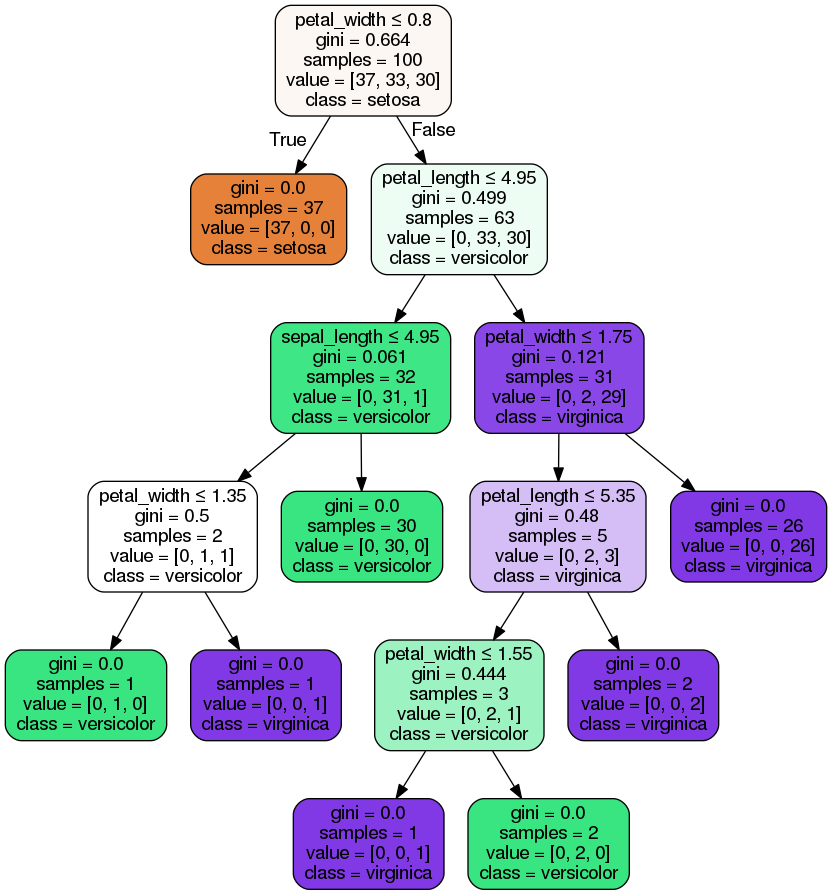

In [33]:
# Met StringIO wordt een tijdelijke file aangemaakt. De classifier wordt met behulp van export_graphviz omgezet in
# dot data (DOT is een taal om graphs mee te beschrijven). De dot data wordt met behulp van pydotplus omgezet in een
# graph. Deze wordt opgeslagen als PNG en in Jupyter getoond.
col_names = ['sepal_length','sepal_width','petal_length','petal_width']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = col_names,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris_classification_tree.png')
Image(graph.create_png())